In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

t_click = 't_click.csv'
t_loan_sum = 't_loan_sum.csv'
t_loan = 't_loan.csv'
t_order = 't_order.csv'
t_user = 't_user.csv'

# t_click.csv

In [2]:
df_click = pd.read_csv(t_click,header=0)
df_click.tail()

,uid,click_time,pid,param
10933011,49776,2016-10-09 11:16:05,8,1
10933012,59092,2016-10-09 11:15:58,1,40
10933013,68517,2016-10-09 11:15:58,8,1
10933014,66826,2016-10-09 11:15:43,7,7
10933015,70759,2016-10-07 21:32:10,8,1


In [3]:
df_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10933016 entries, 0 to 10933015
Data columns (total 4 columns):
uid           int64
click_time    object
pid           int64
param         int64
dtypes: int64(3), object(1)
memory usage: 333.6+ MB


10    5319662
8     2069124
1      951796
6      521929
9      448444
7      371896
5      350695
3      322527
2      294783
4      282160
Name: pid, dtype: int64


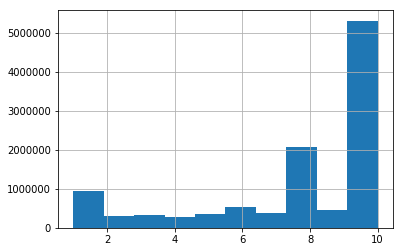

In [4]:
print(df_click['pid'].value_counts())
# plt.hist(df_click['pid'],rwidth = 0.2)
df_click['pid'].hist(bins=10) #Series

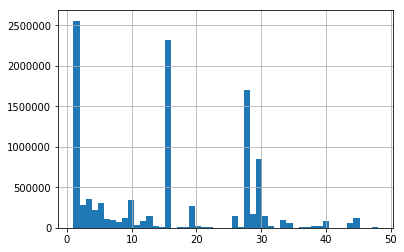

In [5]:
# sns.distplot(df_click['param'])
df_click['param'].hist(bins=50)

In [6]:
print('有点击行为的用户的数量',len(set(df_click['uid'])))
print('有点击行为的用户的数量',len(df_click['uid'].unique()))

有点击行为的用户的数量 78439
有点击行为的用户的数量 78439


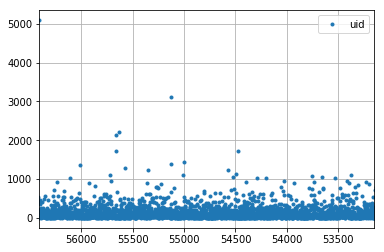

In [7]:
df_click['uid'].value_counts().plot(grid=True,style='.')
plt.legend()
plt.show()

In [8]:
df_click['uid'].value_counts()[:5]

56410    5092
52245    4732
58507    4678
38659    4630
36843    4399
Name: uid, dtype: int64

# t_loan_sum.csv

In [9]:
df_loan_sum = pd.read_csv(t_loan_sum,header=0)
df_loan_sum.head()

,uid,month,loan_sum
0,4,2016-11,4.723017
1,5,2016-11,6.584075
2,6,2016-11,6.266691
3,17,2016-11,5.657311
4,19,2016-11,5.885770


In [10]:
df_loan_sum['month'].unique()

array(['2016-11'], dtype=object)

In [11]:
df_loan_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19520 entries, 0 to 19519
Data columns (total 3 columns):
uid         19520 non-null int64
month       19520 non-null object
loan_sum    19520 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 457.6+ KB


In [12]:
df_loan_sum.describe()

,uid,loan_sum
count,19520.000000,19520.000000
mean,45568.493648,5.568962
std,26229.380257,0.710507
min,4.000000,3.862595
25%,22805.750000,5.153538
50%,45870.000000,5.700626
75%,68293.250000,6.087953
max,90991.000000,8.433019


In [13]:
df_loan_sum.shape

(19520, 3)

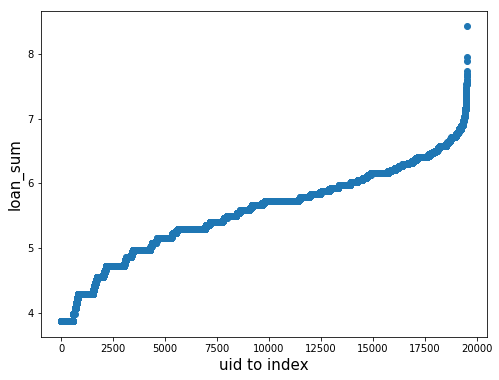

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_loan_sum.shape[0]), np.sort(df_loan_sum['loan_sum'].values))
plt.xlabel('uid to index', fontsize=15)
plt.ylabel('loan_sum', fontsize=15)
plt.show()

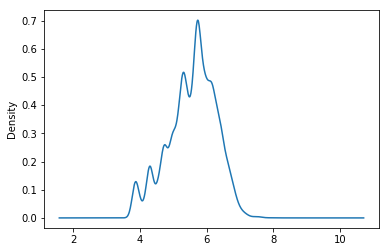

In [13]:
# sns.distplot(df_loan_sum['loan_sum'])
df_loan_sum['loan_sum'].plot(kind='kde')

In [17]:
df1 = pd.merge(df_user,df_loan_sum,how='left',on='uid')
df1.fillna(0,inplace=True)

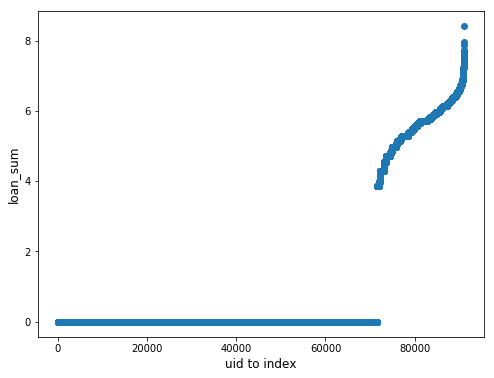

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(range(df1.shape[0]), np.sort(df1.loan_sum.values))
plt.xlabel('uid to index', fontsize=12)
plt.ylabel('loan_sum', fontsize=12)
plt.show()

In [19]:
print('11月有贷款的用户的数量',len(set(df_loan_sum['uid'])))

11月有贷款的用户的数量 19520


# t_loan.csv

In [20]:
df_loan = pd.read_csv(t_loan,header=0)
df_loan.head()

,uid,loan_time,loan_amount,plannum
0,12135,2016-08-03 00:05:26,3.862595,1
1,41403,2016-08-03 00:13:25,5.584137,3
2,74458,2016-08-03 00:13:58,4.723017,1
3,12959,2016-08-03 00:19:33,3.862595,1
4,89641,2016-08-03 00:23:13,4.292651,1


In [21]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202902 entries, 0 to 202901
Data columns (total 4 columns):
uid            202902 non-null int64
loan_time      202902 non-null object
loan_amount    202902 non-null float64
plannum        202902 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.2+ MB


In [22]:
df_loan.describe()

,uid,loan_amount,plannum
count,202902.000000,202902.000000,202902.000000
mean,45708.612586,4.913411,4.394107
std,26178.292813,0.732764,4.448728
min,4.000000,2.867536,1.000000
25%,23252.000000,4.292651,1.000000
50%,45742.000000,4.885961,1.000000
75%,68524.000000,5.405416,6.000000
max,90993.000000,7.584062,12.000000


In [23]:
def conver_time(time):
    return int(time.split('-')[1])
df_loan['month'] = df_loan['loan_time'].map(lambda x: conver_time(x))

In [24]:
print("8月贷款的用户数量：",len(df_loan[df_loan['month']==8]['uid'].unique()))
print("9月贷款的用户数量：",len(df_loan[df_loan['month']==9]['uid'].unique()))
print("10月贷款的用户数量：",len(df_loan[df_loan['month']==10]['uid'].unique()))
print("11月贷款的用户数量：",len(df_loan[df_loan['month']==11]['uid'].unique()))

8月贷款的用户数量： 19534
9月贷款的用户数量： 21628
10月贷款的用户数量： 21381
11月贷款的用户数量： 19520


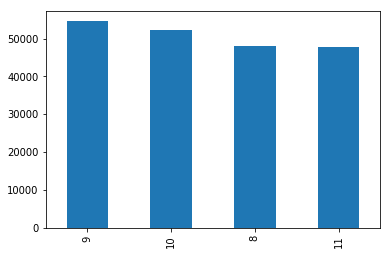

In [25]:
# 每个月的贷款笔数
df_loan['month'].value_counts().plot(kind='bar')
# plt.hist(df_loan['month'],rwidth = 0.8)

In [29]:
# df_loan_sum['loan_sum']
df_chae = df_loan.groupby(['uid','month'],as_index=False).sum()
df_chae = df_chae[df_chae['month']==11]
df_chae = pd.merge(df_chae,df_loan_sum,how='outer',on='uid')
df_chae['diff'] = df_chae['loan_sum']-df_chae['loan_amount']

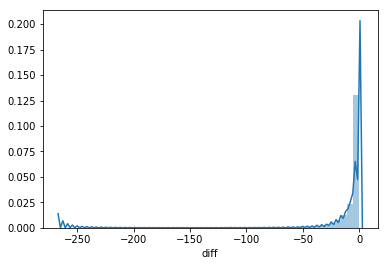

In [30]:
sns.distplot(df_chae['diff'])

In [31]:
df_chae['diff'].describe()

count    1.952000e+04
mean    -6.555231e+00
std      1.333765e+01
min     -2.642294e+02
25%     -8.173688e+00
50%     -3.000000e-10
75%      2.000000e-10
max      5.000009e-10
Name: diff, dtype: float64

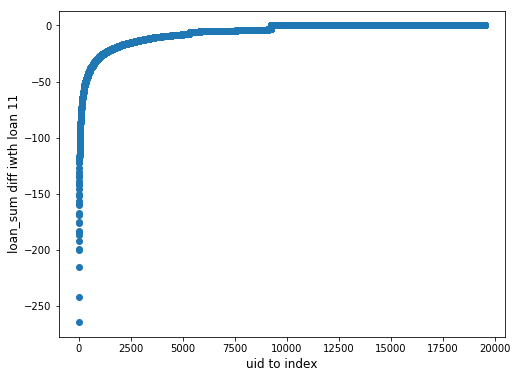

In [32]:
diff = sorted(df_chae['diff'].tolist())
plt.figure(figsize=(8,6))
plt.scatter(range(len(diff)), diff)
plt.xlabel('uid to index', fontsize=12)
plt.ylabel('loan_sum diff iwth loan 11', fontsize=12)
plt.show()

In [33]:
# log(500) , x^a ,log(x+1)
import math 
for i in range(2,11):
    loan_amount = math.pow(i,5.584137)
    print(i,loan_amount)

2 47.972542568354925
3 461.6474616649102
4 2301.3648404726255
5 8000.999865390347
6 22146.402506292907
7 52377.315277093636
8 110402.32277488838
9 213118.37886165478
10 383828.3066318405


In [34]:
math.pow(5,5.584137) -1,       round(math.pow(5,5.584137) -1)

(7999.999865390347, 8000)

In [35]:
def change_data(x):
    return round(math.pow(5,x)-1)

df_loan_sum['loan_sum'] = df_loan_sum['loan_sum'].map(lambda x: change_data(x))
df_loan['loan_amount'] = df_loan['loan_amount'].map(lambda x: change_data(x))
df_chae = df_loan.groupby(['uid','month'],as_index=False).sum()
df_chae = df_chae[df_chae['month']==11]
df_chae = pd.merge(df_chae,df_loan_sum,how='outer',on='uid')
df_chae['diff'] = df_chae['loan_sum']-df_chae['loan_amount']

/Users/wangle/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/wangle/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


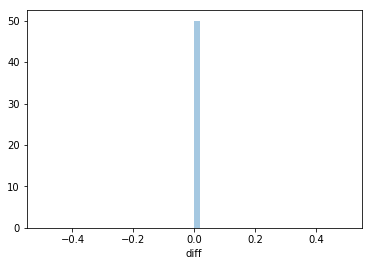

In [36]:
sns.distplot(df_chae['diff'])

In [37]:
df1 = df_loan.copy()
df1 = df1.groupby(['uid','month'],as_index=False).sum()
df1.head()

,uid,month,loan_amount,plannum
0,4,8,9000,2
1,4,10,16000,13
2,4,11,2000,3
3,5,11,40000,12
4,6,9,24000,3


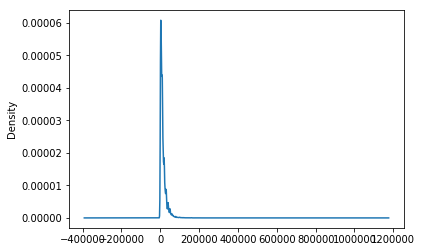

In [38]:
df1['loan_amount'].plot(kind='kde')

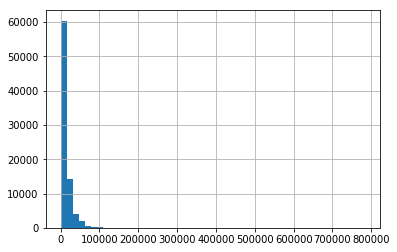

In [39]:
df1['loan_amount'].hist(bins=50)

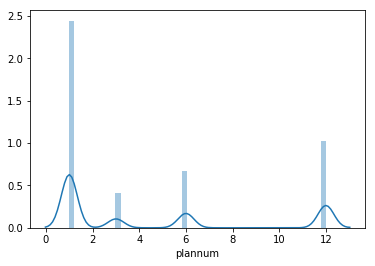

In [40]:
sns.distplot(df_loan['plannum'])

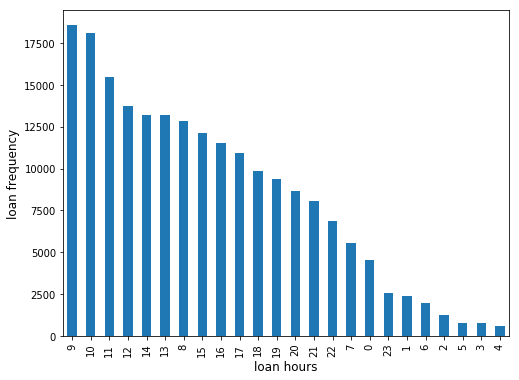

In [41]:
df_loan['loan_time_hours'] = df_loan['loan_time'].map(lambda x: int(x.split(' ')[1].split(':')[0]))
plt.figure(figsize=(8,6))
df_loan['loan_time_hours'].value_counts().plot(kind='bar')
plt.xlabel('loan hours', fontsize=12)
plt.ylabel('loan frequency', fontsize=12)
plt.show()

In [44]:
df_user['limit'] = df_user['limit'].map(lambda x: change_data(x))
df_limit = df_user[['uid','limit']]
month_df = df_loan.copy().groupby(['uid','month'],as_index=False).sum()
month_8 = month_df[month_df['month']==8]
month_9 = month_df[month_df['month']==9]
month_10 = month_df[month_df['month']==10]
month_11 = month_df[month_df['month']==11]

def _map_num(x):
    if x >= 0:
        return 1
    else:
        return 0

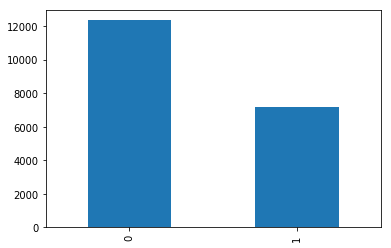

In [45]:
month_8 = pd.merge(month_8,df_limit,how='left',on='uid')
month_8['exceed_loan'] = month_8['loan_amount'] - month_8['limit']
month_8['exceed_loan'] = month_8['exceed_loan'].map(lambda x : _map_num(x))
month_8['exceed_loan'].value_counts().plot(kind='bar')

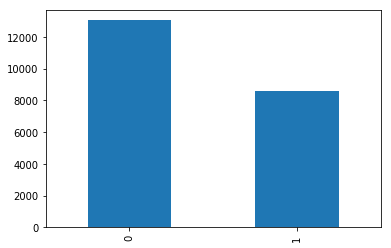

In [46]:
month_9 = pd.merge(month_9,df_limit,how='left',on='uid')
month_9['exceed_loan'] = month_9['loan_amount'] - month_9['limit']
month_9['exceed_loan'] = month_9['exceed_loan'].map(lambda x : _map_num(x))
month_9['exceed_loan'].value_counts().plot(kind='bar')

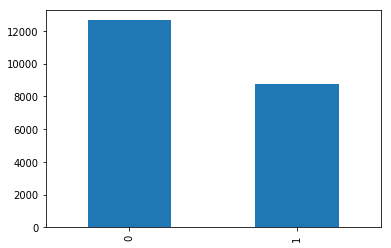

In [47]:
month_10 = pd.merge(month_10,df_limit,how='left',on='uid')
month_10['exceed_loan'] = month_10['loan_amount'] - month_10['limit']
month_10['exceed_loan'] = month_10['exceed_loan'].map(lambda x : _map_num(x))
month_10['exceed_loan'].value_counts().plot(kind='bar')

# t_order.csv

In [48]:
df_order = pd.read_csv(t_order,header=0)
df_order.head()

,uid,buy_time,price,qty,cate_id,discount
0,45370,2016-11-23,3.995009,1,22,0.0
1,66975,2016-11-23,3.269410,1,26,0.0
2,75358,2016-11-23,2.255235,1,14,0.0
3,40597,2016-11-23,1.635284,1,20,0.0
4,83886,2016-11-23,1.920573,2,22,0.0


In [49]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400778 entries, 0 to 5400777
Data columns (total 6 columns):
uid         int64
buy_time    object
price       float64
qty         int64
cate_id     int64
discount    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 247.2+ MB


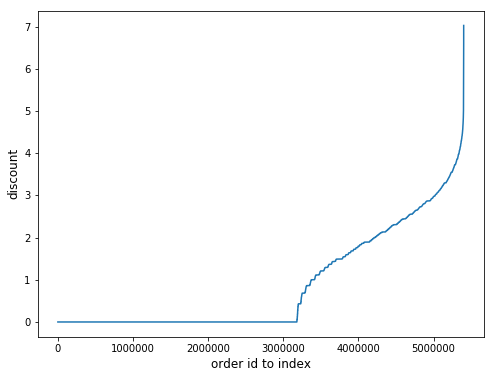

In [50]:
# sns.distplot(df_order['discount'])
discount = sorted(df_order['discount'].tolist())
plt.figure(figsize=(8,6))
plt.plot(range(len(discount)), discount)
plt.xlabel('order id to index', fontsize=12)
plt.ylabel('discount', fontsize=12)
plt.show()

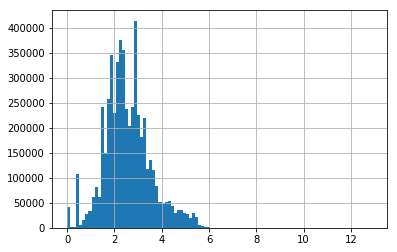

In [51]:
df_order['price'].hist(bins=100)

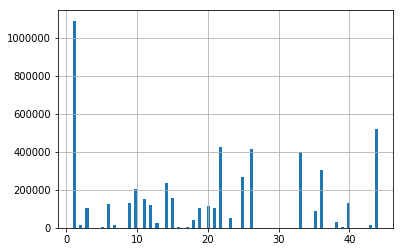

In [57]:
df_order['cate_id'].hist(bins=100)

# t_user.csv

In [16]:
df_user = pd.read_csv(t_user,header=0)
df_user.head()

,uid,age,sex,active_date,limit
0,26308,30,1,2016-02-16,5.974677
1,78209,40,1,2016-02-21,5.292154
2,51930,35,1,2016-04-19,6.292055
3,10113,25,1,2016-03-12,6.292055
4,17067,35,1,2016-02-16,5.974677


In [58]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90993 entries, 0 to 90992
Data columns (total 5 columns):
uid            90993 non-null int64
age            90993 non-null int64
sex            90993 non-null int64
active_date    90993 non-null object
limit          90993 non-null int64
dtypes: int64(4), object(1)
memory usage: 3.5+ MB


In [59]:
from datetime import datetime
df_user['month'] = df_user['active_date'].map(lambda x: conver_time(x))
# df_user['limit'] = df_user['limit'].map(lambda x: change_data(x))
df_user['active_date'] = df_user['active_date'].map(lambda x: datetime.strptime('2016-12-1','%Y-%m-%d') - datetime.strptime(x, '%Y-%m-%d'))

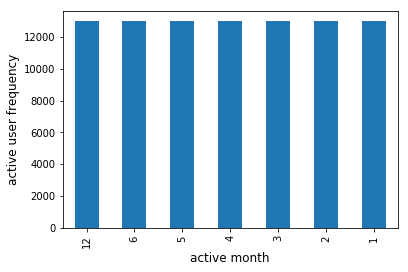

In [60]:
# plt.hist(df_user['month'],rwidth = 0.8)
df_user['month'].value_counts().plot(kind='bar')
plt.xlabel('active month', fontsize=12)
plt.ylabel('active user frequency', fontsize=12)
plt.show()

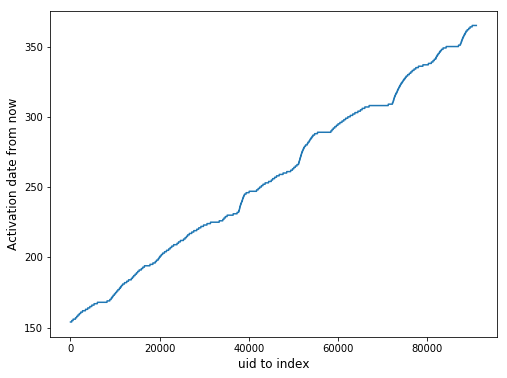

In [61]:
df_user['active_date'] = df_user['active_date'].map(lambda x : x.days)

sort_active_date = sorted(df_user['active_date'].tolist())
plt.figure(figsize=(8,6))
plt.plot(range(len(sort_active_date)), sort_active_date)
plt.xlabel('uid to index', fontsize=12)
plt.ylabel('Activation date from now', fontsize=12)
plt.show()

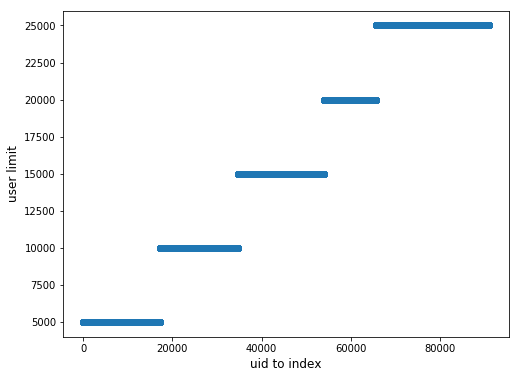

In [62]:
sort_limit = sorted(df_user['limit'].tolist())
plt.figure(figsize=(8,6))
plt.scatter(range(len(sort_limit)), sort_limit)
plt.xlabel('uid to index', fontsize=12)
plt.ylabel('user limit', fontsize=12)
plt.show()

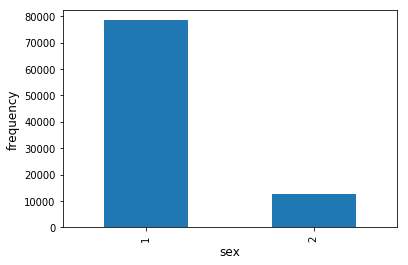

In [63]:
df_user['sex'].value_counts().plot(kind='bar')
plt.xlabel('sex', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.show()

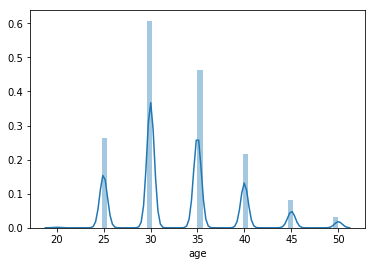

In [64]:
sns.distplot(df_user['age'])

In [65]:
df = pd.DataFrame({'foo': ['one','one','one','two','two','two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6]})


In [66]:
df.pivot(index='foo', columns='bar', values='baz').reset_index()

bar,foo,A,B,C
0,one,1,2,3
1,two,4,5,6


In [67]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [69]:
df['as'] = 2
df

,bar,baz,foo,as
0,A,1,one,2
1,B,2,one,2
2,C,3,one,2
3,A,4,two,2
4,B,5,two,2
5,C,6,two,2


In [70]:
df.loc[:,'baz'] = df['as']/df['baz']
df

,bar,baz,foo,as
0,A,2.000000,one,2
1,B,1.000000,one,2
2,C,0.666667,one,2
3,A,0.500000,two,2
4,B,0.400000,two,2
5,C,0.333333,two,2


In [74]:
df.loc[:,'e'] = df['as']/df['baz']
df

,bar,baz,foo,as,w,e
0,A,2.000000,one,2,1.0,1.0
1,B,1.000000,one,2,2.0,2.0
2,C,0.666667,one,2,3.0,3.0
3,A,0.500000,two,2,4.0,4.0
4,B,0.400000,two,2,5.0,5.0
5,C,0.333333,two,2,6.0,6.0


In [79]:
df['bar'][df['foo']=='one'][df['w']==1.]

0    A
Name: bar, dtype: object